## Inputs

In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, log_loss
from sklearn import svm #support vector machines
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from functions import *

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Read in data

In [5]:
# load data, 
# not using a cleaning function
# dropping ingredients used in less than 0.00013 recipies

X, y, features = get_design_matrix(cleaning_function = clean, min_df = 3)

print("There are %d recipies and %d feautres" % (X.shape[0], len(features)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# The set of different cuisines
data = pd.read_json('train.json')
cuisines = data.cuisine.unique()

There are 39774 recipies and 2176 feautres


## Test svm kernels

In [3]:
# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, degree = 2, C = 0.1)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    print("Using the kernel %s we get an accuracy of %.4f" % (kernel, accuracy_score(y_test, preds)))

Using the kernel linear we get an accuracy of 0.7747
Using the kernel poly we get an accuracy of 0.1967
Using the kernel rbf we get an accuracy of 0.3573


### Systematic test of poly kernels

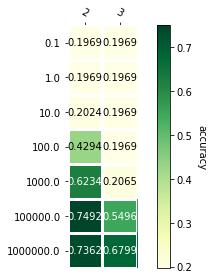

array([[0.19692638, 0.19692638],
       [0.19692638, 0.19692638],
       [0.20242595, 0.19692638],
       [0.42942838, 0.19692638],
       [0.6234    , 0.20654302],
       [0.74917569, 0.54960725],
       [0.73619652, 0.67990794]])

In [3]:
def poly_svm_tester(X_train, y_train, C_list = [0.1], degrees = [2], folds = 10, plot = False) :
    """
    Test the svm parameter C and the degree of the poly kernel
    using cross validation
    
    If plot is set to true, show a heatmap of the results
    """

    svm_constructor = (lambda p,q : svm.SVC(kernel = 'poly', C = p, degree = q)) 
    scores = clf_cross_validator(X_train, y_train, svm_constructor, C_list, degrees, folds = folds, plot = plot, label = 'accuracy')
    return scores 

poly_svm_tester(x_train, y_train, C_list = [0.1, 1, 10, 100, 1000, 100000, 1000000], degrees = [2, 3], folds = 3, plot = True) 

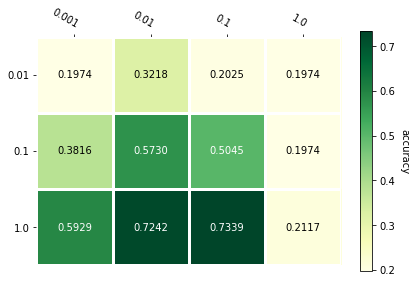

array([[0.19742928, 0.32179049, 0.20245796, 0.19742928],
       [0.38162848, 0.57295878, 0.50450999, 0.19742928],
       [0.59285259, 0.72419072, 0.73393145, 0.21166628]])

In [6]:
def rbf_svm_tester(X_train, y_train, C_list = [0.1], gamma_list = [0.1], folds = 10, plot = False) :
    """
    Test the svm parameters C and gamma of svm with brf kernel
    using cross validation
    
    If plot is set to true, show a heatmap of the results
    """

    svm_constructor = (lambda p,q : svm.SVC(kernel = 'rbf', C = p, gamma = q)) 
    scores = clf_cross_validator(X_train, y_train, svm_constructor, C_list, gamma_list, folds = folds, plot = plot, label = 'accuracy')
    return scores 

rbf_svm_tester(x_train, y_train, C_list = [0.01, 0.1,1], gamma_list = [0.001, 0.01, 0.1, 1], folds = 3, plot = True) 

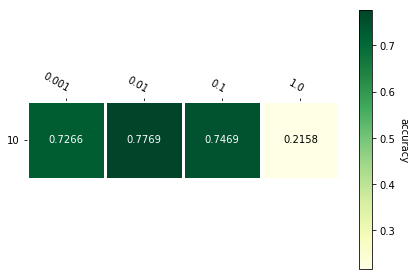

array([[0.72664368, 0.77692662, 0.74691204, 0.21575132]])

In [7]:
rbf_svm_tester(x_train, y_train, C_list = [10], gamma_list = [0.001, 0.01, 0.1, 1], folds = 3, plot = True) 

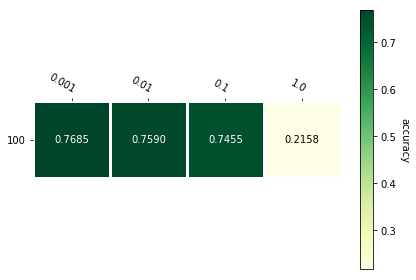

array([[0.76853605, 0.75901281, 0.74546643, 0.21575132]])

In [8]:
rbf_svm_tester(x_train, y_train, C_list = [100], gamma_list = [0.001, 0.01, 0.1, 1], folds = 3, plot = True) 